In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('coffee sales.csv')

In [6]:
df = data.copy()

In [7]:
df.head(7)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate


In [8]:
# last 7 row
df.tail(7)

,date,datetime,cash_type,card,money,coffee_name
1126,2024-07-31,2024-07-31 20:51:10.383,card,ANON-0000-0000-0443,32.82,Latte
1127,2024-07-31,2024-07-31 20:52:14.802,card,ANON-0000-0000-0153,32.82,Cappuccino
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte
1132,2024-07-31,2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte


In [9]:
# descriptive statistics
df.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [10]:
# consise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [11]:
# shape - define row,col in dataframe
df.shape

(1133, 6)

In [12]:
# size - total elements
df.size

6798

In [13]:
# check any null value
df.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [14]:
# check datatypes
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [15]:
# check unique value in card column
df['card'].nunique()

446

In [16]:
# check in dataframe
df.nunique()

date            150
datetime       1133
cash_type         2
card            446
money            16
coffee_name       8
dtype: int64

In [17]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [18]:
df.loc[0, 'coffee_name']  # label based indexing

'Latte'

In [19]:
df.iloc[0, 5]  # integer location base indexing

'Latte'

In [20]:
df['card'].astype

<bound method NDFrame.astype of 0       ANON-0000-0000-0001
1       ANON-0000-0000-0002
2       ANON-0000-0000-0002
3       ANON-0000-0000-0003
4       ANON-0000-0000-0004
               ...         
1128    ANON-0000-0000-0443
1129    ANON-0000-0000-0040
1130    ANON-0000-0000-0444
1131    ANON-0000-0000-0445
1132    ANON-0000-0000-0446
Name: card, Length: 1133, dtype: object>

In [21]:
# fill missing value
df['card'] = df['card'].fillna('0')

In [22]:
df['card'].isna().sum()

0

In [23]:
df['card'].nunique()

447

In [71]:
df.duplicated().sum()

0

## outliers check

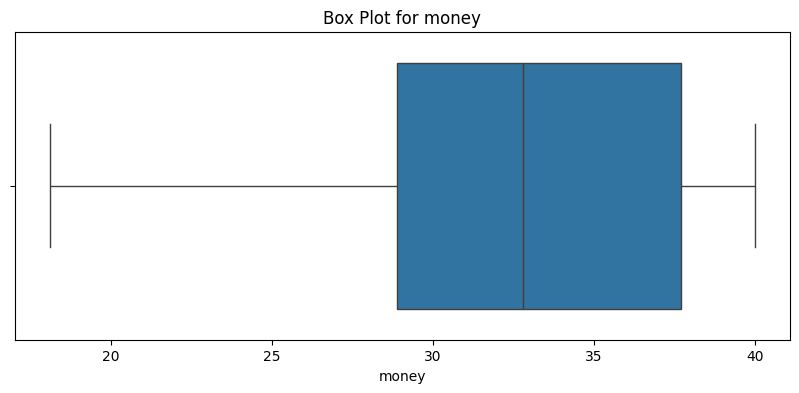

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot for {column}')
        plt.show()

## datetime

In [73]:
# retrieve date, time, month, week and create column of this

df['datetime'] = pd.to_datetime(df['datetime'])
df['time'] = df['datetime'].dt.time
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['week'] = df['date'].dt.to_period('W')
df['year'] = df['date'].dt.to_period('Y')

In [74]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,time,month,week,year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000,2024-03,2024-02-26/2024-03-03,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000,2024-03,2024-02-26/2024-03-03,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000,2024-03,2024-02-26/2024-03-03,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000,2024-03,2024-02-26/2024-03-03,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000,2024-03,2024-02-26/2024-03-03,2024


## analyze and visualize money column

In [26]:
df['money'].sum()

37508.880000000005

In [27]:
df['money'].count()

1133

In [28]:
# group by 
money_grpby = df.groupby('coffee_name').agg({'money':['sum', 'count']})
money_grpby

money      
                         sum count
coffee_name                       
Americano            4644.54   169
Americano with Milk  8601.94   268
Cappuccino           7333.14   196
Cocoa                1295.94    35
Cortado              2745.08    99
Espresso             1100.62    49
Hot Chocolate        2778.48    74
Latte                9009.14   243

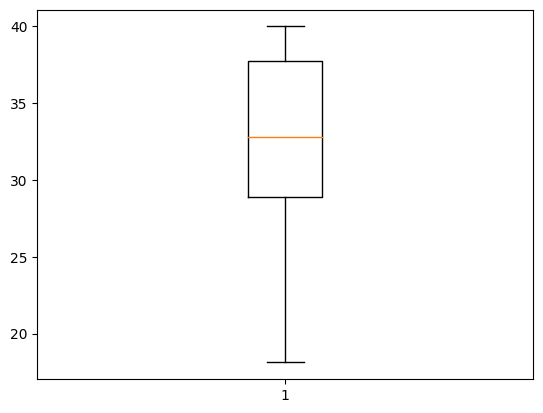

In [29]:
## visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(df['money'])
plt.show()

In [30]:
month_grpby = df.groupby('month').agg({'money':['sum', 'count']})
month_grpby

money      
             sum count
month                 
2024-03  7050.20   206
2024-04  6720.56   196
2024-05  9063.42   267
2024-06  7758.76   227
2024-07  6915.94   237

In [31]:
# barplot- x = money, y - month 
# df_col = df['money', 'month',]
df_by_month = df.groupby("month").agg({"money": ["sum", "count"]}).reset_index()
df_by_month.columns = ["month", "money", "cups"]  # count --> no_of cups
df_by_month


,month,money,cups
0,2024-03,7050.20,206
1,2024-04,6720.56,196
2,2024-05,9063.42,267
3,2024-06,7758.76,227
4,2024-07,6915.94,237


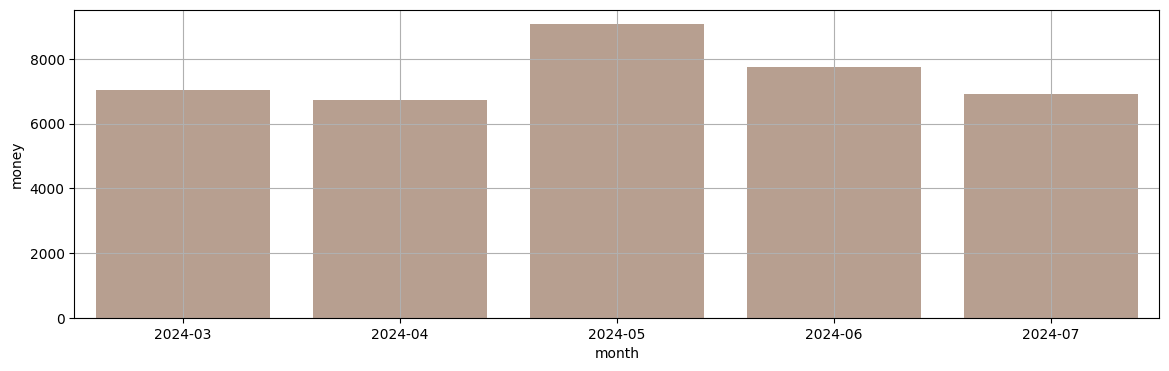

In [32]:
plt.figure(figsize=(14, 4))
sns.barplot(df_by_month, y="money", x="month", color="#bd9e8a")
plt.grid()

In [33]:
# money for each week

df_week = df.groupby('week').agg({'money':['sum','count']}).reset_index()
df_week.columns = ['week','money','cups']
df_week

,week,money,cups
0,2024-02-26/2024-03-03,973.50,28
1,2024-03-04/2024-03-10,1840.50,53
2,2024-03-11/2024-03-17,1516.30,47
3,2024-03-18/2024-03-24,1307.80,38
4,2024-03-25/2024-03-31,1412.10,40
5,2024-04-01/2024-04-07,1434.50,42
6,2024-04-08/2024-04-14,1666.00,48
7,2024-04-15/2024-04-21,1838.84,53
8,2024-04-22/2024-04-28,1251.20,37
9,2024-04-29/2024-05-05,890.18,26


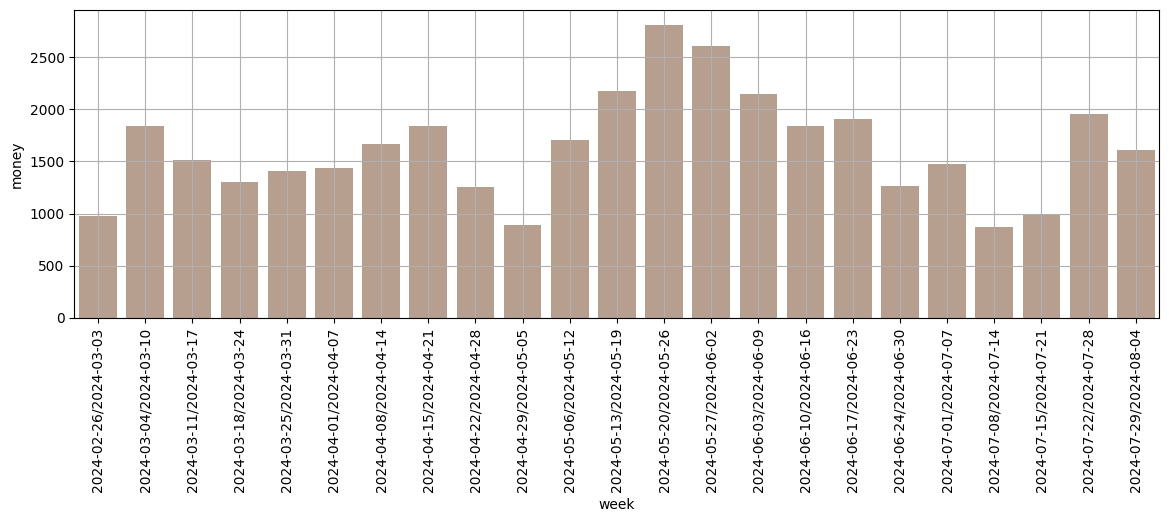

In [34]:
plt.figure(figsize = (14,4))
sns.barplot(df_week, y='money', x='week', color ='#bd9e8a')
plt.xticks(rotation=90)
plt.grid()

In [38]:
# money for each date

date_range = pd.date_range(start = df['date'].min(), end =df['date'].max())
complete_dates = pd.DataFrame(date_range, columns=["date"])
df_date = df.groupby('date').agg({'money':['sum','count']}).reset_index()
df_date.columns = ['date','money','cups']
# left join
df_join = pd.merge(complete_dates, df_date, on = 'date', how = 'left')
df_join

,date,money,cups
0,2024-03-01,396.30,11.0
1,2024-03-02,228.10,7.0
2,2024-03-03,349.10,10.0
3,2024-03-04,135.20,4.0
4,2024-03-05,338.50,9.0
...,...,...,...
148,2024-07-27,372.76,13.0
149,2024-07-28,78.86,3.0
150,2024-07-29,321.82,11.0
151,2024-07-30,650.48,24.0


(0.0, 681.6080000000001)

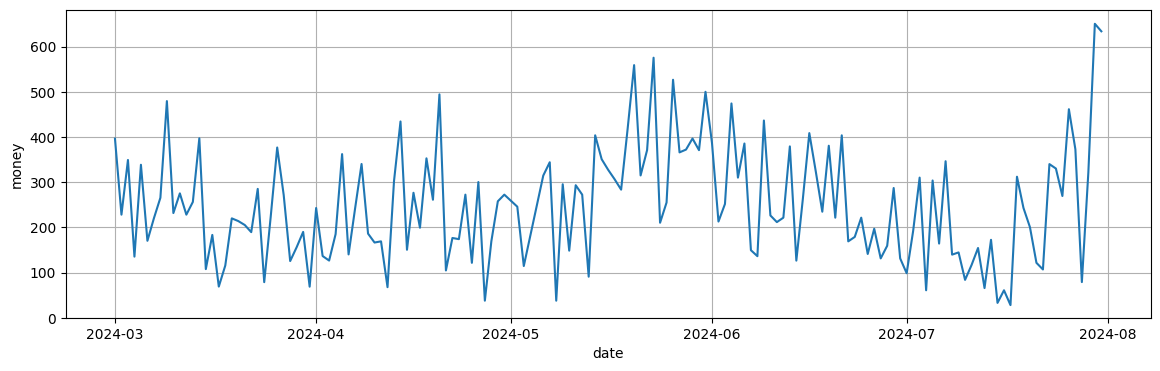

In [47]:
# visualize trends ver time by lineplot
plt.figure(figsize=(14,4))
sns.lineplot(data = df_join, y='money',x='date')
plt.grid()
plt.ylim(0)  # used to get or set the y-limits of the current axes.

## distribution by coffee type

In [48]:
df_coffee_type = df.groupby('coffee_name').agg({'money':'count'}).reset_index()
df_coffee_type.columns = ['coffee_name','cups']
df_coffee_type= df_coffee_type.sort_values('cups', ascending = False)
df_coffee_type

,coffee_name,cups
1,Americano with Milk,268
7,Latte,243
2,Cappuccino,196
0,Americano,169
4,Cortado,99
6,Hot Chocolate,74
5,Espresso,49
3,Cocoa,35


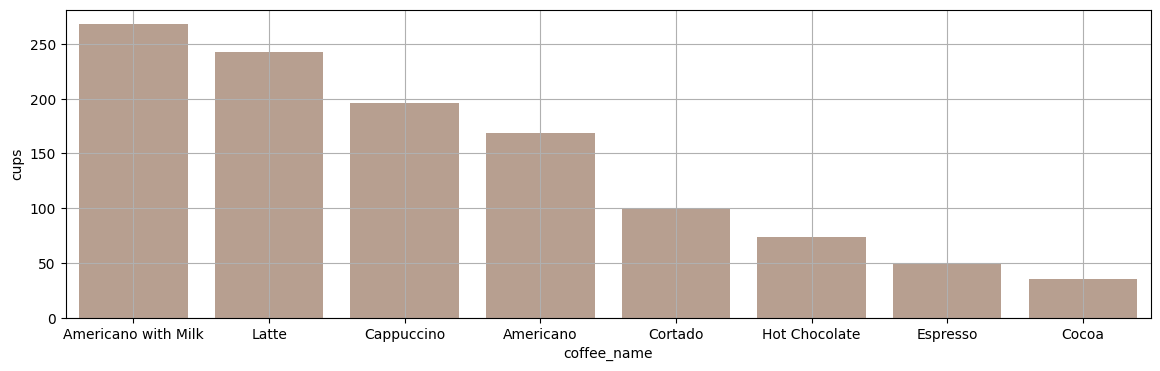

In [50]:
# visualie by barplot
plt.figure(figsize=(14,4))
sns.barplot(df_coffee_type, x='coffee_name', y='cups', color='#bd9e8a')
plt.grid()

## mean check in a day


In [56]:
# date_range -  for generating sequences of dates. It allows you to specify the starting date, ending date
date_range = pd.date_range(start= df['date'].min(), end= df['date'].max())
complete_dates = pd.DataFrame(date_range , columns=['date'])
df_by_date = df.groupby('date').agg({'money':'mean'}).reset_index()
df_by_date.columns = ['date','avg']
df_merge = pd.merge(complete_dates, df_by_date, on = 'date', how='left')
df_merge

,date,avg
0,2024-03-01,36.027273
1,2024-03-02,32.585714
2,2024-03-03,34.910000
3,2024-03-04,33.800000
4,2024-03-05,37.611111
...,...,...
148,2024-07-27,28.673846
149,2024-07-28,26.286667
150,2024-07-29,29.256364
151,2024-07-30,27.103333


(0.0, 40.003166666666665)

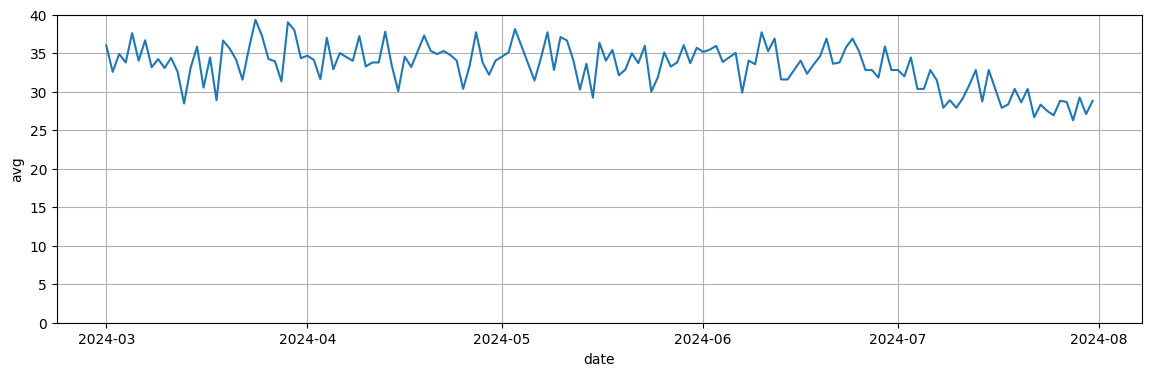

In [58]:
# visualize avg. of money over date
plt.figure(figsize=(14,4))
sns.lineplot(data= df_merge, y='avg', x='date')
plt.grid()
plt.ylim(0)

## mean check in a day for each type

In [65]:
date_range = pd.date_range(start= df['date'].min(), end= df['date'].max())
df_completes = pd.DataFrame(date_range, columns=['date'])
df_by_date = df.groupby(['date','coffee_name']).agg({'money':['max']}).reset_index()
df_by_date.columns = ['date','coffee_name','price']
df_by_date

,date,coffee_name,price
0,2024-03-01,Americano,28.90
1,2024-03-01,Americano with Milk,33.80
2,2024-03-01,Cocoa,38.70
3,2024-03-01,Hot Chocolate,38.70
4,2024-03-01,Latte,38.70
...,...,...,...
595,2024-07-31,Americano with Milk,27.92
596,2024-07-31,Cappuccino,32.82
597,2024-07-31,Cocoa,32.82
598,2024-07-31,Cortado,23.02


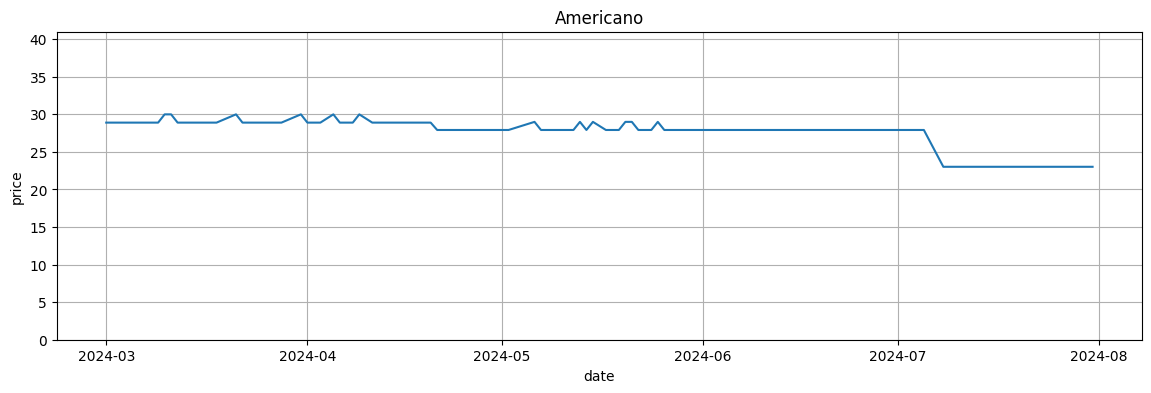

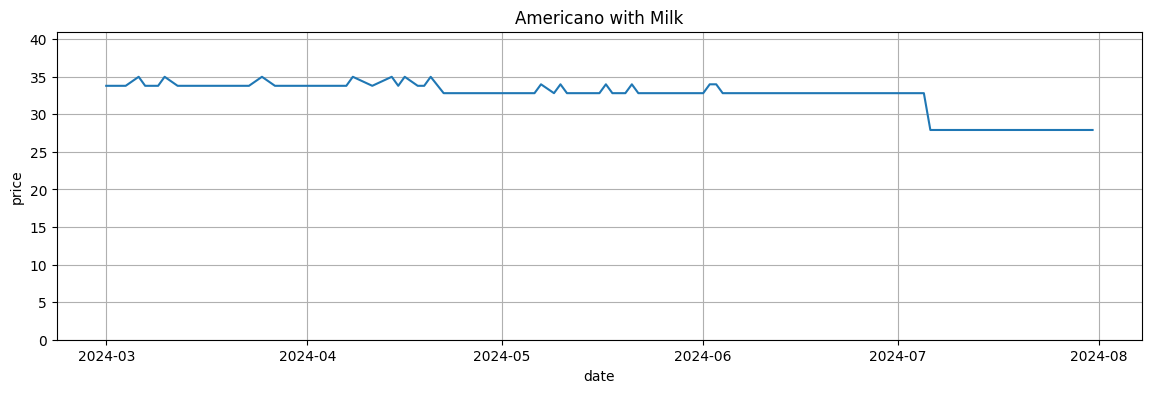

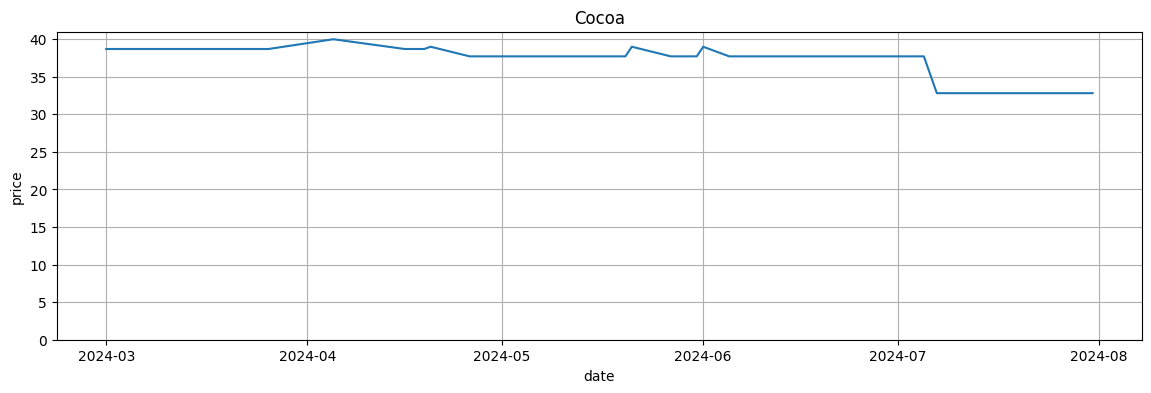

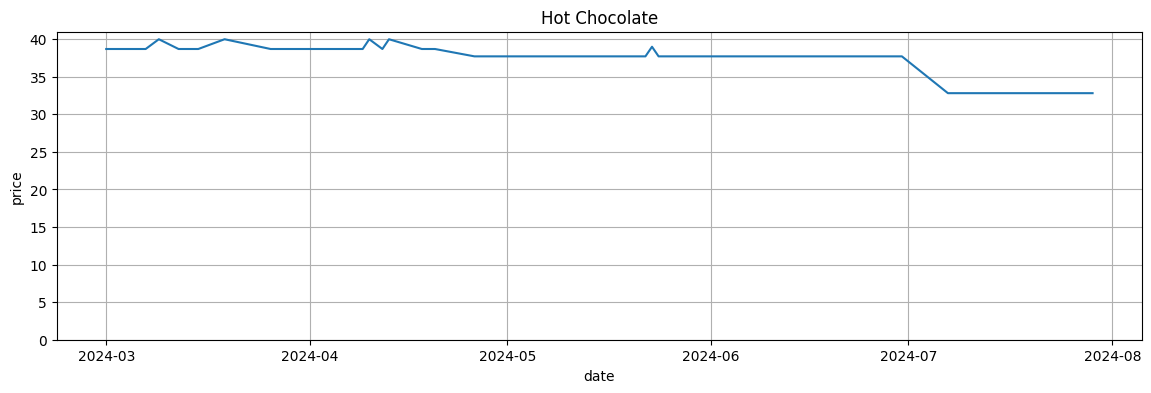

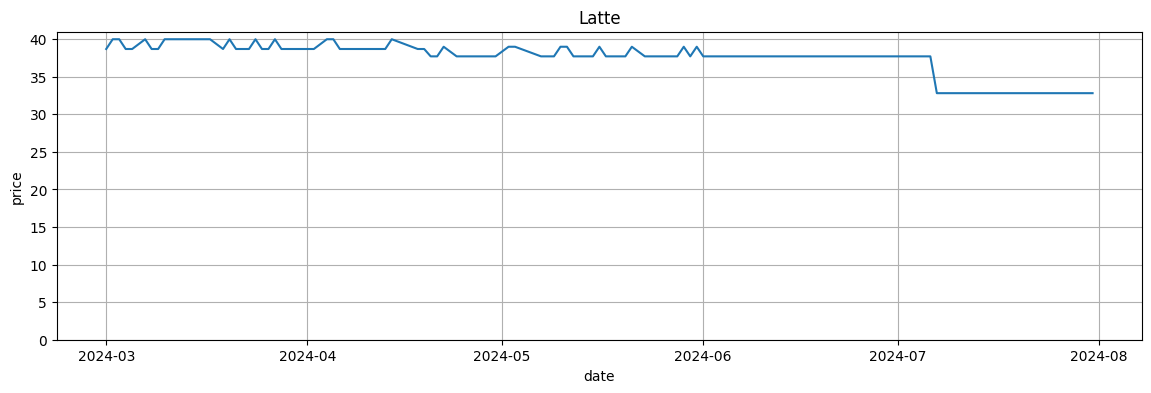

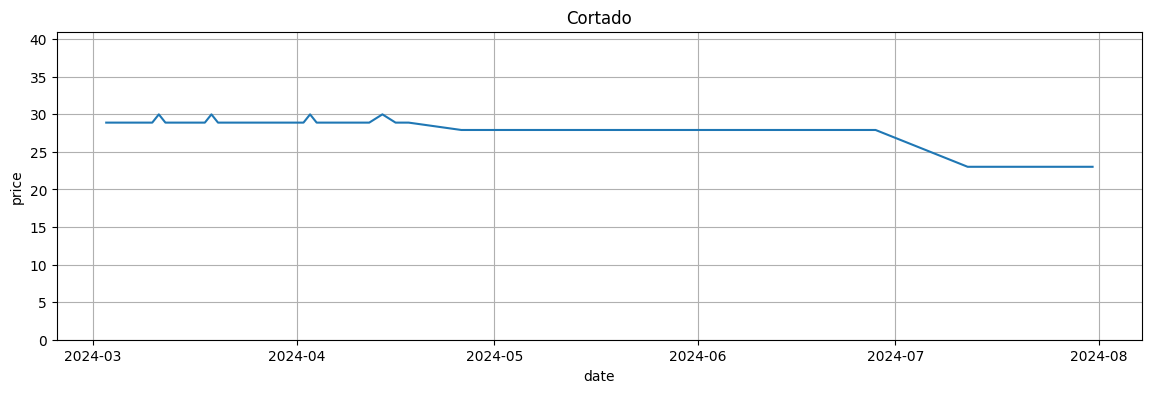

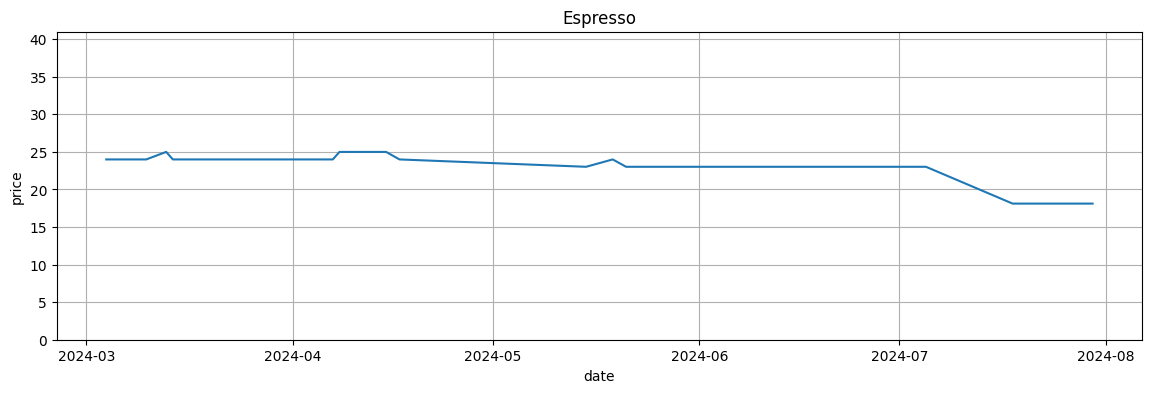

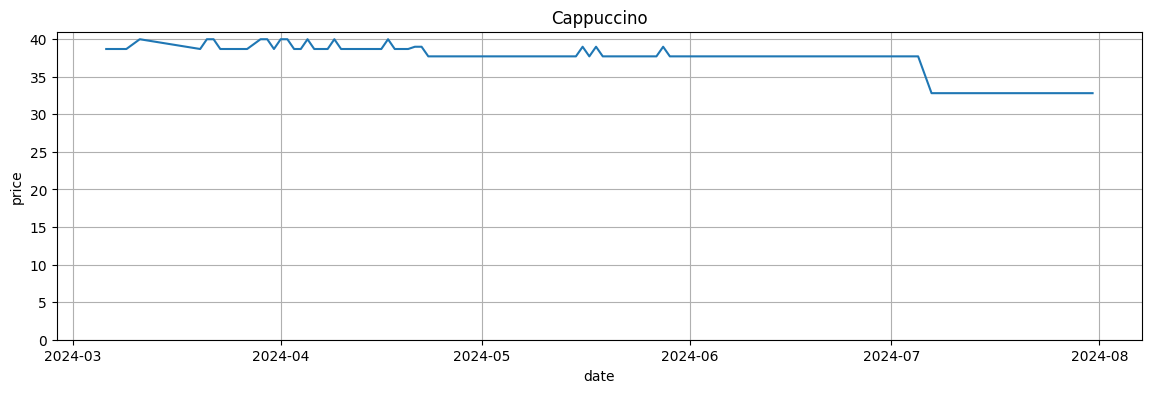

In [69]:
# line plotting- mean check in a day for each coffee type
for x in df_by_date['coffee_name'].unique():
    plt.figure(figsize=(14,4))
    plt.title(x)
    sns.lineplot(data= df_by_date[df_by_date['coffee_name']== x], y='price', x='date')
    plt.grid()
    plt.ylim(0,41)